# 1. Поиск наиболее близкого имени участника

In [1]:
# conda install -c conda-forge python-levenshtein
# или pip install python-levenshtein

import Levenshtein

In [2]:
# что было написано в заявке

claim_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

In [3]:
# результат расшифровки речи диктора

speech_recognition = [
    'кучменко она',
    'кущенко оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

In [23]:
# Строим структуру данных для дальнейшей обработки:
distances = {}
for recognized_name in speech_recognition:
    subdistances = {}
    for real_name in claim_list:
        subdistances[real_name] = Levenshtein.distance(recognized_name, real_name)
    distances[recognized_name] = subdistances

In [35]:
distances

{'кучменко она': {'Шехавцова Анна': 11,
  'Гречихина Наталья': 14,
  'Козлова Алена': 11,
  'Груздева Алина': 10,
  'Кущенко Анна': 5,
  'Чистякова Анастасия': 15},
 'кущенко оксана': {'Шехавцова Анна': 11,
  'Гречихина Наталья': 15,
  'Козлова Алена': 11,
  'Груздева Алина': 11,
  'Кущенко Анна': 5,
  'Чистякова Анастасия': 14},
 'груздь алина': {'Шехавцова Анна': 11,
  'Гречихина Наталья': 14,
  'Козлова Алена': 9,
  'Груздева Алина': 5,
  'Кущенко Анна': 10,
  'Чистякова Анастасия': 16},
 'рычихина наталья': {'Шехавцова Анна': 14,
  'Гречихина Наталья': 3,
  'Козлова Алена': 14,
  'Груздева Алина': 14,
  'Кущенко Анна': 14,
  'Чистякова Анастасия': 12},
 'шиховцева на': {'Шехавцова Анна': 6,
  'Гречихина Наталья': 14,
  'Козлова Алена': 9,
  'Груздева Алина': 9,
  'Кущенко Анна': 10,
  'Чистякова Анастасия': 13},
 'чистова анастасия': {'Шехавцова Анна': 13,
  'Гречихина Наталья': 12,
  'Козлова Алена': 12,
  'Груздева Алина': 14,
  'Кущенко Анна': 14,
  'Чистякова Анастасия': 4}}

In [36]:
# Выводим наиболее подходящие варианты для каждого распознанного клиента
for k in distances:
    print(k, '===', sorted(distances[k], key = distances[k].get)[0])


кучменко она === Кущенко Анна
кущенко оксана === Кущенко Анна
груздь алина === Груздева Алина
рычихина наталья === Гречихина Наталья
шиховцева на === Шехавцова Анна
чистова анастасия === Чистякова Анастасия


# 2. Распознавание цифр

In [50]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [38]:
digits = datasets.load_digits()

In [39]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

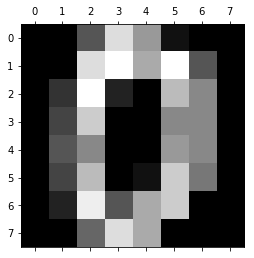

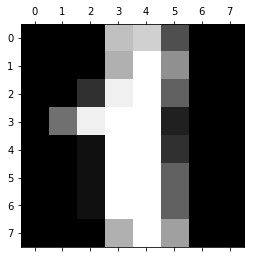

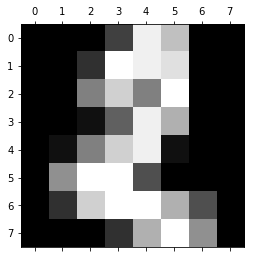

In [40]:
plt.gray()
for i in range(0, 3):
    plt.matshow(digits.images[i])
    
plt.show() 

In [43]:
X_digits = digits.data
Y_digits = digits.target

In [44]:
split = int( len( X_digits ) * .9 )

In [45]:
X_train = X_digits[:split]
Y_train = Y_digits[:split]

In [48]:
X_test = X_digits[split:]
Y_test = Y_digits[split:]

In [61]:
n_neighbors = 3
knn = KNeighborsClassifier( n_neighbors, weights = 'distance' )
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [62]:
knn.score( X_test, Y_test )

0.9611111111111111

In [63]:
knn.predict(X_test)

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 9, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 3, 5, 4,
       4, 5, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 5, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       8, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 5, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 1, 4, 9,
       0, 8, 9, 8])

In [64]:
Y_test

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])